In [2]:

from tensorflow.keras.datasets import mnist, fashion_mnist
import numpy as np

In [4]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [5]:
# y 데이터 분포 확인
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
# 정규화 
x_train = x_train / 255
x_test = x_test / 255

In [8]:
# Target을 one-hot-encoding
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

print(y_test.shape)
print(y_train.shape)

(10000, 10)
(60000, 10)


In [9]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(layer=Conv2D(32, (3,3), padding='same',
                       activation='relu', strides=(1,1),
                       input_shape=(28,28,1)))
model.add(layer=MaxPooling2D(pool_size=(2,2), strides=2))
# model.summary()

model.add(layer=Conv2D(filters=64, kernel_size=(3,3), padding='same',
                       activation='relu', strides=(1,1)))
model.add(layer=MaxPooling2D(pool_size=(2,2), strides=2))
# model.summary()

model.add(layer=Flatten())
model.add(layer=Dense(128, activation='relu'))
model.add(layer=Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

2022-06-30 13:52:53.184295: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')

In [27]:
hist = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.1439 - acc: 0.9552 - val_loss: 0.0535 - val_acc: 0.9840
Epoch 2/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0447 - acc: 0.9860 - val_loss: 0.0476 - val_acc: 0.9848
Epoch 3/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0294 - acc: 0.9903 - val_loss: 0.0366 - val_acc: 0.9889
Epoch 4/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0211 - acc: 0.9929 - val_loss: 0.0470 - val_acc: 0.9869
Epoch 5/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0158 - acc: 0.9947 - val_loss: 0.0358 - val_acc: 0.9893
Epoch 6/10
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0123 - acc: 0.9958 - val_loss: 0.0381 - val_acc: 0.9898
Epoch 7/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0107 - acc: 0.9962 - val_loss: 0.0512 - val_acc: 0.9883
Epoch 8/10
1500/1500 [==========================

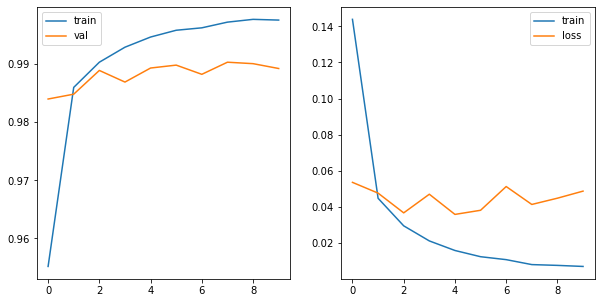

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['train', 'val'])

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train', 'loss'])

In [29]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0331 - acc: 0.9912


[0.033101886510849, 0.9911999702453613]